# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [3]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

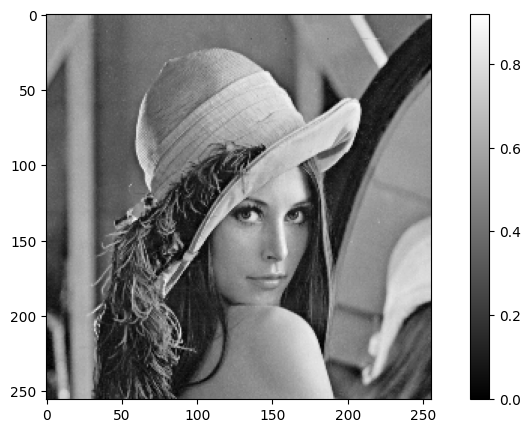

In [4]:
img=plt.imread('data/lena.png')
plt.figure(figsize=(10,5)), plt.imshow(img, 'gray')
plt.colorbar()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [5]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if n <= p[0] < img.shape[0] - n and n <= p[1] < img.shape[1] - n:
            for q in numpy.ndindex(size, size):
                neighborhood_sum += img[p[0]+q[0]-n,p[1]+q[1]-n]
        
        result[p[0],p[1]] = neighborhood_sum/size**2
    return result



**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7ffa42f6d850>)

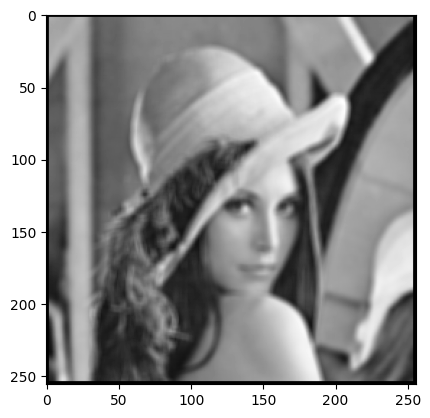

In [6]:
img_f = meanfilter(img, size=5)
plt.figure(), plt.imshow(img_f, 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [7]:
img_m5=plt.imread('data/lena_meanfilter5.png')
numpy.allclose(img_f, img_m5, atol=1/255 )

True

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [17]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_med = []
        for q in numpy.ndindex(size,size):
            if p[0] < 0 or p[1] <0 or p[0]>img.shape[0]-n-1 or p[1]>img.shape[1]-n-1:
                result[p]=0
            else:
                intensity = img[p[0] + q[0] - n, p[1] + q[1] - n]
                neighborhood_med.append(intensity)
                median=neighborhood_med[len(neighborhood_med)//2]
                       
        result[p] = median
    return result

In [16]:

#clear nicht notwendig

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

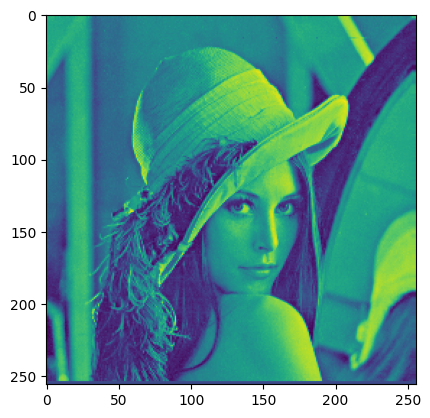

In [18]:
img_median = medianfilter(img, size= 5)
plt.imshow(img_median)

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

False

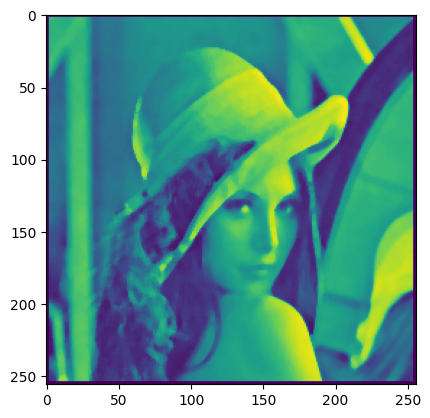

In [21]:
img_med5=plt.imread('data/lena_medianfilter5.png')
plt.imshow(img_med5)
numpy.allclose(img_median, img_med5, atol=1/255 )

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

In [ ]:
#das randproblem kann auf verschiedene weisen gelöst werden

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: